In [1]:
!pip install openpyxl
!pip install japanize-matplotlib
import numpy as np
import pandas as pd
import os
import re
import itertools
from matplotlib import pyplot as plt
import japanize_matplotlib

In [2]:
ns_st = ['泉中央', '八乙女', '黒松', '旭ヶ丘', '台原', '北仙台', '北四番丁', '勾当台公園', '広瀬通',
    '仙台', '五橋', '愛宕橋', '河原町', '長町一丁目', '長町', '長町南', '富沢']
ew_st = ['八木山動物公園', '青葉山', '川内', '国際センター', '大町西公園', '青葉通一番町', '仙台', '宮城野通', '連坊',
         '薬師堂', '卸町', '六丁の目', '荒井']
all_st = ns_st + [s for s in ew_st if s !='仙台']
cols = ['年', '月', '乗車駅', '降車駅', '合計', '定期券外', '普通券計', '普通券大', '乗継計', '乗継大', '乗継小', '地下売', 'バス売', '一日券', 'プリペ', 'ICSF', 'その他', '定期計', '通勤', '通学', '学都', '公用', '敬老', 'ふれあい', 'その他.1']

In [5]:
FYs = [2018, 2019, 2020, 2021, 2022]
dfs = {FY:pd.read_csv("data/Sendai_subway_OD_FY{}.csv".format(FY)) for FY in FYs}
for FY in FYs:
    dfs[FY]["年月"]=pd.to_datetime(dfs[FY]["年"].astype(str)+dfs[FY]["月"].astype(str), format="%Y%m")
df = pd.concat(dfs.values())

In [4]:
dfs[2018]

,年,月,乗車駅,降車駅,合計,定期券外,普通券計,普通券大,乗継計,乗継大,...,ICSF,その他,定期計,通勤,通学,学都,公用,敬老,ふれあい,その他.1
0,2018,4,泉中央,八乙女,20836,9902,2114,1874,0,0,...,7510,0,10934,5770,234,1439,5,2433,1053,0
1,2018,4,泉中央,黒松,13794,7062,1332,1142,0,0,...,5580,0,6732,2758,242,912,0,2182,638,0
2,2018,4,泉中央,旭ヶ丘,19562,8887,1626,1364,0,0,...,7113,0,10675,4092,222,1856,2,3238,1265,0
3,2018,4,泉中央,台原,17599,8033,1519,1306,0,0,...,6410,0,9566,3503,284,3838,2,1291,648,0
4,2018,4,泉中央,北仙台,39399,17853,3136,2931,0,0,...,14544,0,21546,8517,2577,7472,6,1864,1110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,2019,3,荒井,宮城野通,6523,3007,459,421,0,0,...,2500,0,3516,2690,1,367,0,245,213,0
9740,2019,3,荒井,連坊,2095,922,158,152,0,0,...,747,0,1173,681,0,264,0,141,87,0
9741,2019,3,荒井,薬師堂,2556,1404,204,181,0,0,...,923,0,1152,541,0,217,0,202,192,0
9742,2019,3,荒井,卸町,4009,2165,373,331,0,0,...,1700,0,1844,1205,0,237,2,218,182,0


Text(0.5, 1.0, '降車駅別')

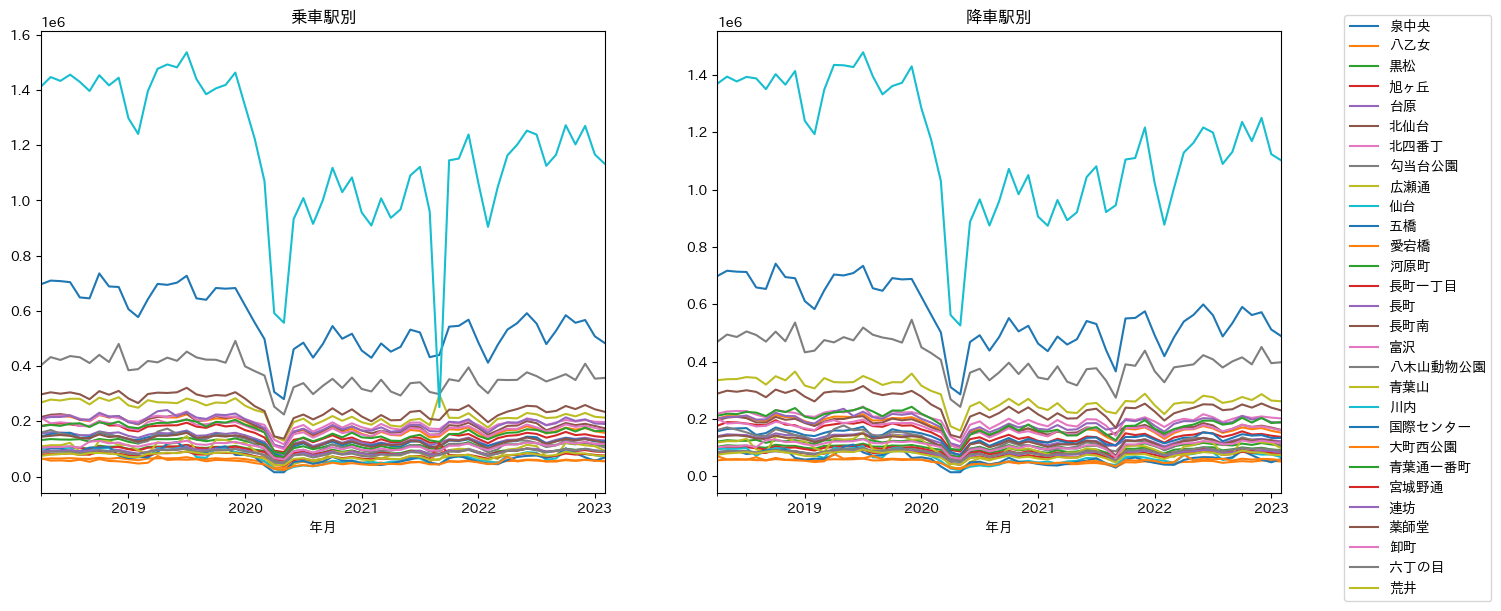

In [7]:
orig_df = df.groupby(["乗車駅","年月"]).sum(numeric_only=True)["合計"]
dest_df = df.groupby(["降車駅","年月"]).sum(numeric_only=True)["合計"]
fig, ax = plt.subplots(1, 2, figsize=(8*2,6))
for st in all_st:
    orig_df.xs(st, level="乗車駅").plot(ax=ax[0], label=st)
    dest_df.xs(st, level="降車駅").plot(ax=ax[1], label=st)
#ax[0].legend(bbox_to_anchor=(1.1, 1.05))
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
ax[0].set_title("乗車駅別")
ax[1].set_title("降車駅別")